1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, integrate
import pylab as pl
from numpy import sin,cos
import pandas as pd
from  scipy import fftpack
import scipy.fftpack as fft

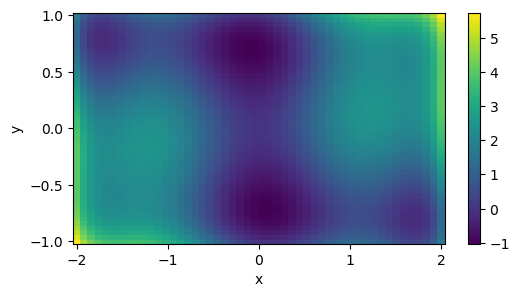

In [42]:
def f(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]
            + (-4 + 4*x[1]**2) * x[1] **2)

x = np.linspace(-2, 2) #x between -2,2
y = np.linspace(-1, 1) #y between -1,1
xm, ym = np.meshgrid(x, y) 

plt.figure(figsize = (6,3))
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(plt.pcolor(x, y, a))
plt.show([-2, 2, -1, 1])
print()


2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

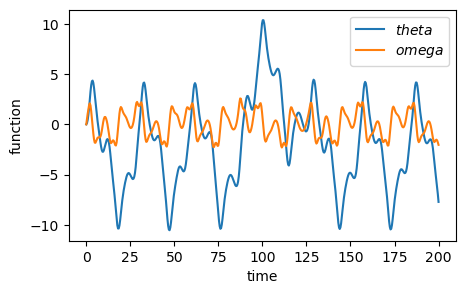

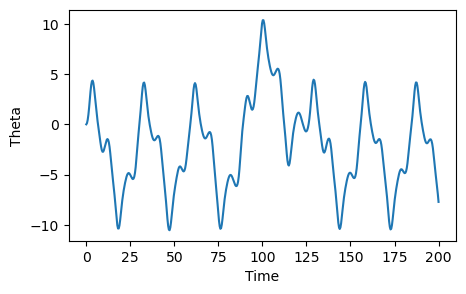

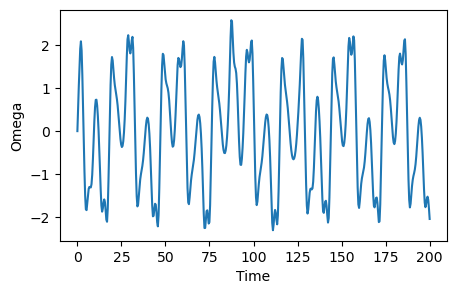

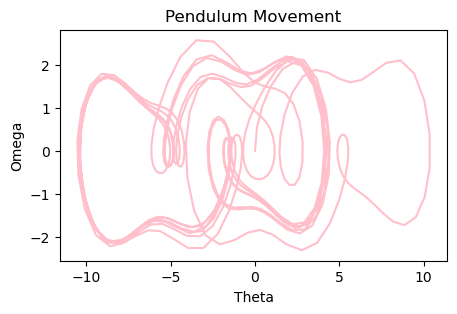

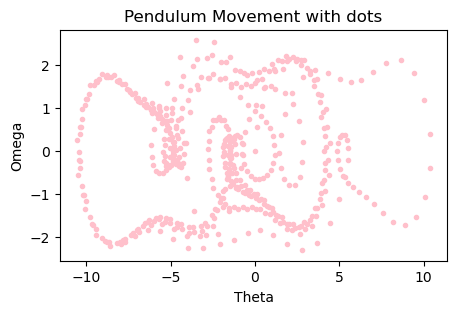

In [20]:
def deriv(theta, t, q, d, w):
    theta1, omega1 = theta
    dtheta1_dt = omega1
    dtheta2_dt = -((1/q) * omega1) + sin(theta1) + d*(cos(w*t))
    dtheta_dt = [dtheta1_dt, dtheta2_dt]
    return dtheta_dt

t=np.linspace(0, 200, 500)
q=2.0
d=1.5
w0=0
theta0=0
w=0.65

X = integrate.odeint(deriv, [theta0, w0], t, args=(q, d, w))
theta, w = X.T

plt.figure(figsize=(5, 3))
plt.plot(t, X[:, 0], label="$theta$")
plt.plot(t, X[:, 1], label="$omega$")
plt.xlabel('time')
plt.ylabel('function')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(5, 3))
plt.plot(t, theta)
plt.xlabel('Time')
plt.ylabel('Theta')
plt.show()

plt.figure(figsize=(5, 3))
plt.plot(t, w)
plt.xlabel('Time')
plt.ylabel('Omega')
plt.show()


plt.figure(figsize=(5, 3))
plt.plot(theta, w, 'pink')
plt.title('Pendulum Movement')
plt.xlabel('Theta')
plt.ylabel('Omega')
plt.show()

plt.figure(figsize=(5, 3))
plt.plot(theta, w, '.', c='pink')
plt.title('Pendulum Movement with dots')
plt.xlabel('Theta')
plt.ylabel('Omega')
plt.show()

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

In [45]:
!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/

--2023-01-20 15:56:58--  https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ebe1cnyd2gm836a/populations.txt [following]
--2023-01-20 15:56:58--  https://www.dropbox.com/s/raw/ebe1cnyd2gm836a/populations.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6b003c39b90b89e1e6192cc605.dl.dropboxusercontent.com/cd/0/inline/B05Vnv-Xh4NDunM2Xujx8V2xqbK8AzSQzaysS6GAk2lMkGJJK3N_uPcwmkebaNUzu670nwFY2Gx2C6xx-7mJajpy6HiqKB34uN9peQY1pDayueJJUZGENKOx5JMbuJaFCFyixfj2bTQg7oRqne8DjMNV-zXdT510Tcc0JsT1yum-WQ/file# [following]
--2023-01-20 15:56:59--  https://uc6b003c39b90b89e1e6192cc605.dl.dropboxusercontent.com/cd/0/inline/B05Vnv-Xh4NDunM2Xujx8V2xqbK8AzSQzaysS6GAk2lMkGJJK3N_uPcwmkebaNUzu670nwFY2Gx2C6xx-7mJajpy6HiqKB34u

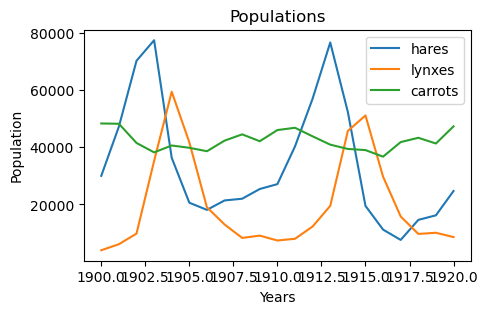

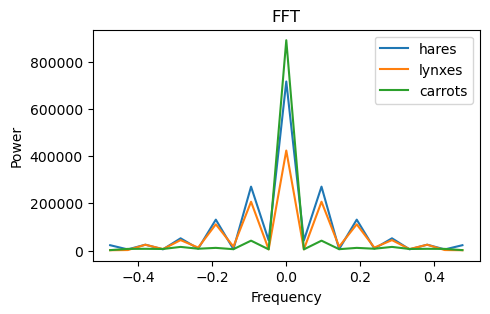


Population periods of lynxes, hares and carrots:  10.5


In [50]:
dataset = np.loadtxt('data/populations.txt')
year, hare, lynx, carrot = dataset.T

fft_hare=fft.fft(hare)
fft_lynx=fft.fft(lynx)
fft_carrot=fft.fft(carrot)

pow_spec_hare = np.abs(fft_hare)
pow_spec_lynx = np.abs(fft_lynx)
pow_spec_carrot = np.abs(fft_carrot)

sample_freq_lynx = fft.fftfreq(fft_lynx.size)
i = sample_freq_lynx.argsort()
sample_freq_hare = fft.fftfreq(fft_hare.size)
j = sample_freq_hare.argsort()
sample_freq_carrot = fft.fftfreq(fft_carrot.size)
k = sample_freq_carrot.argsort()

plt.figure(figsize=(5, 3))
plt.plot(year, hare, label='hares')
plt.plot(year, lynx, label='lynxes')
plt.plot(year, carrot, label='carrots')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Populations')
plt.legend()
plt.show()

plt.figure(figsize=(5, 3))
plt.plot(sample_freq_lynx[i], pow_spec_hare[i], label='hares')
plt.plot(sample_freq_hare[j], pow_spec_lynx[j], label='lynxes')
plt.plot(sample_freq_carrot[k], pow_spec_carrot[k], label='carrots')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend(('Hares', 'Lynxs'), loc='best')
plt.title("FFT")
plt.legend()
plt.show()

pos_mask_lynx = np.where(sample_freq_lynx > 0)
freqs_lynx = sample_freq_lynx[pos_mask_lynx]
powes_lynx = pow_spec_lynx[pos_mask_lynx]
peak_freq_lynx = freqs_lynx[powes_lynx.argmax()]
print("\nPopulation periods of lynxes, hares and carrots: ", 1/peak_freq_lynx)

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

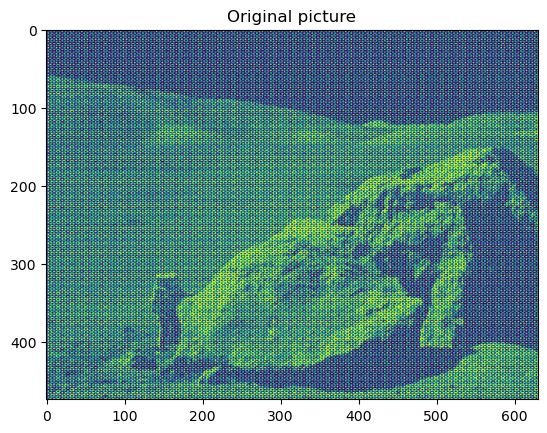

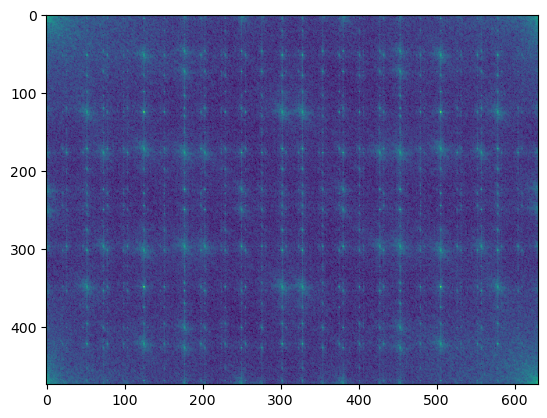

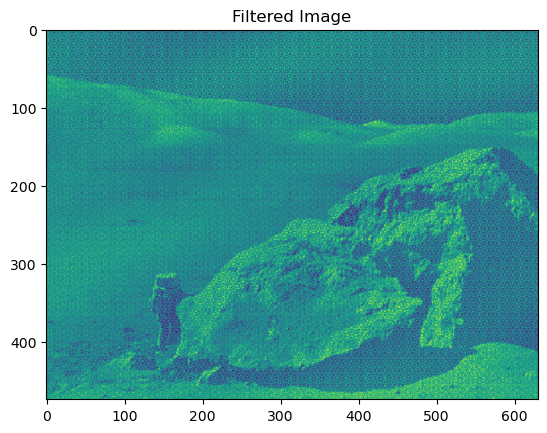

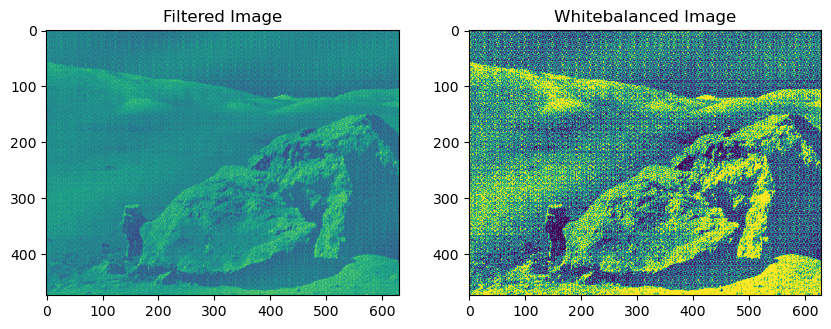

In [109]:
import numpy as np
from scipy import fftpack 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

img = plt.imread("images/moonlanding.png")
plt.imshow(img)

plt.title('Original picture')
plt.show()

#noise detection
image_fft = fftpack.fft2(img)
plt.imshow(np.abs(image_fft), norm = LogNorm(vmin=5))
plt.show()

image_fft[np.abs(image_fft) > 3500] = 0
plt.imshow(np.abs(image_fft))

filtered_image = fftpack.ifft2(image_fft).real
plt.imshow(filtered_image)
plt.title('Filtered Image')

plt.show()
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].imshow(filtered_image)
ax[0].set_title('Filtered Image')
filtered_image_m = (filtered_image*1/ filtered_image.mean(axis=(0,1)))
ax[1].imshow(filtered_image_m.clip(0, 1))
ax[1].set_title('Whitebalanced Image');
